In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colorbar import ColorbarBase
from matplotlib import cm
from enmspring.graphs_bigtraj import BackboneMeanModeAgent
from enmspring.kappa_mat import KMat
from enmspring.kappa_mat_backbone import KappaBackbone, KappaStrandBackbone, MeanKappaStrandBackbone, MeanKappaStrandHetreoBackbone
from enmspring.na_seq import sequences
rootfolder = '/home/ytcdata/bigtraj_fluctmatch/500ns'

### Part 1: Initialize s-agent

In [2]:
host = 'gcgc_21mer'
interval_time = 500
s_agent = BackboneMeanModeAgent(host, rootfolder, interval_time)

/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/mean_mode_npy exists
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/0_500/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/250_750/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/500_1000/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/750_1250/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/1000_1500/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/1250_1750/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/1500_2000/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/1750_2250/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/2000_2500/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/2250_2750/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/2500_3000/pd_dfs exists
/home/ytcdata

### Part 2: Initialize k-agent

In [3]:
kmat_agent = KMat(s_agent)

Load laplacian_mat from /home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/mean_mode_npy/laplacian_backbone.npy
Thare are 855 nodes.
Total number of nodes: 855
There are 429 eigenvectors belonging to STRAND1.
There are 426 eigenvectors belonging to STRAND2.
Sum of two strands: 855


### Part 3: Set Strand ID

In [12]:
strand_id = 'STRAND2' #  STRAND1, STRAND2

### Part 4: Get K-mat

In [6]:
# Set start-mode, end-mode
m = 1 # start mode
n = s_agent.get_last_mode_by_strand_id(strand_id) # end mode

mode_list = list(range(m, n+1))
kmat = kmat_agent.get_K_mat_by_strandid_modelist(strand_id, mode_list)
kmat = kmat_agent.set_diagonal_zero(kmat)
print(f'Minimum: {kmat.min():.3f}')
print(f'Maximum: {kmat.max():.3f}')
#kmat[np.where(kmat > 5)]

Minimum: -0.000
Maximum: 29.556


### Part 5: Set Normalize

In [4]:
vmin = 5
vmax = 29.556
norm = Normalize(vmin=vmin, vmax=vmax)

### Part 6: Build $\kappa$

In [7]:
d_seq = {'STRAND1': sequences[host]['guide'], 'STRAND2': sequences[host]['target']}
seq = d_seq[strand_id]
dmap = s_agent.get_map_idx_from_strand_resid_atomname()

In [8]:
resid_i = 11
k_agent = KappaBackbone(host, strand_id, resid_i, s_agent, dmap, seq)

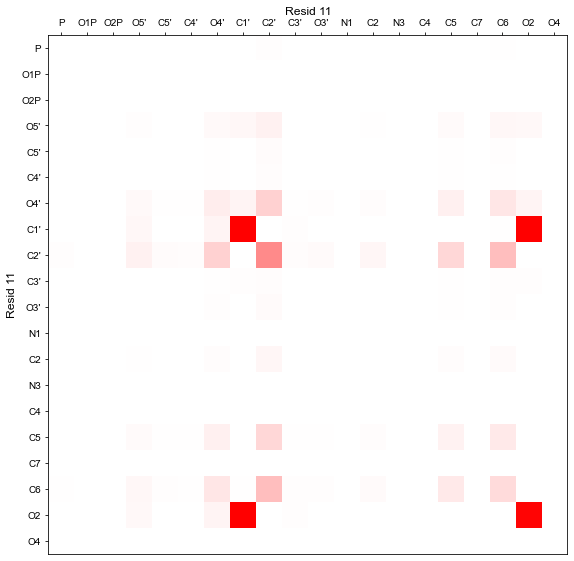

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
im = k_agent.heatmap(ax, kmat, norm)
plt.tight_layout()
plt.show()

### Part 7: Strand Plot

In [22]:
ks_agent = KappaStrandBackbone(host, strand_id, s_agent, kmat_agent)

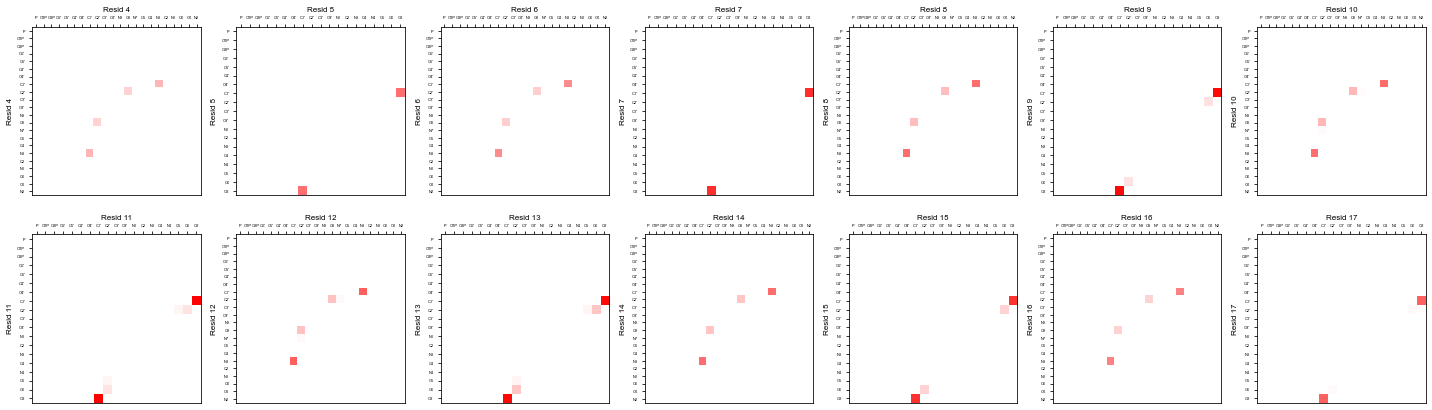

In [23]:
figsize = (20, 6)
fig, d_axes = ks_agent.plot_all_heatmap(figsize, m, n, vmin, vmax, lbfz=8, tickfz=4)
plt.tight_layout()
#plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_{strand_id}_{m}_{n}.png', dpi=200, transparent=False)
plt.show()

### Part 8: Mean Kappa

In [8]:
if host in ['a_tract_21mer', 'g_tract_21mer']:
    m_agent = MeanKappaStrandBackbone(host, strand_id, s_agent, kmat_agent)
elif host in ['atat_21mer', 'gcgc_21mer']:
    basetype_i = 'C' # 'A', 'T', 'G', 'C'
    m_agent = MeanKappaStrandHetreoBackbone(host, basetype_i, s_agent, kmat_agent)

In [9]:
# Set start-mode, end-mode
if host in ['a_tract_21mer', 'g_tract_21mer']:
    m = 1 # start mode
    n = s_agent.get_last_mode_by_strand_id(strand_id) # end mode
elif host in ['atat_21mer', 'gcgc_21mer']:
    m = 1 # start mode
    n = s_agent.get_last_mode_by_strand_id('STRAND1') + s_agent.get_last_mode_by_strand_id('STRAND2') # end mode
dot_criteria = 8.

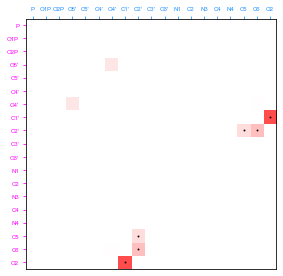

In [10]:
figsize = (4, 4)

fig, im_j, axes = m_agent.plot_mean_heatmap_single(figsize, m, n, vmin, vmax, dot_criteria)
plt.tight_layout()

if host in ['a_tract_21mer', 'g_tract_21mer']:
    plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_{strand_id}_{m}_{n}.svg', dpi=300, transparent=False)
elif host in ['atat_21mer', 'gcgc_21mer']:
    plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_{basetype_i}_{m}_{n}.svg', dpi=300, transparent=False)
plt.show()

### Color Bar

In [18]:
CMAP = LinearSegmentedColormap.from_list('mycmap', ['white','red'])

In [20]:
figsize = (1, 1)
fig = plt.figure(figsize=figsize)
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap(CMAP)
cb1 = ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='horizontal')
cb1.ax.tick_params(labelsize=4, length=1, pad=1.0, width=0.4)
cb1.set_ticks([5, 10, 15, 20, 25, 30])
cb1.outline.set_linewidth(0.4)
plt.savefig('/home/yizaochen/Desktop/drawzone_temp/colorbar.svg', dpi=300, transparent=True)
plt.show()